#### NOTE: Due to low computer memory, I was not able to balance out the target variable in the training data using SMOTE. Model performance is therefore quite poor, however the coding, logic, and most importantly the EDA + Visualizations are all still there

### Source of Data: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset 

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv(r'C:\Users\jules\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
df.shape

(1470, 35)

In [7]:
pd.set_option('display.max_columns', 100)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<Axes: xlabel='Attrition', ylabel='count'>

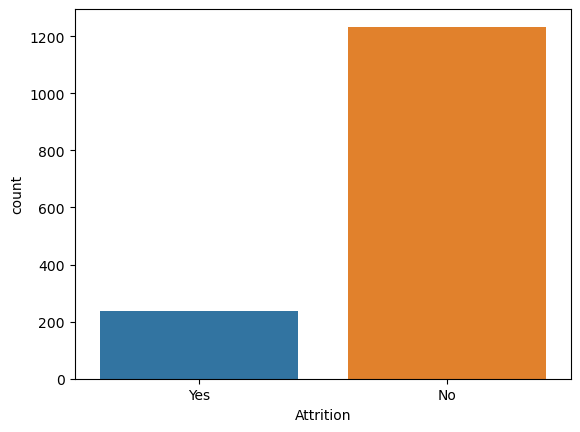

In [18]:
#Checking the balance of our target variable:
sns.countplot(data=df, x = 'Attrition', hue = 'Attrition')

### Label is highly unbalanced which can negatively affect a machine learning model's performance, will need to be balanced later

In [77]:
#Converting Attrition to a binary numerical variable, 1 for yes, 0 for no:

df['Attrition'] = df['Attrition'].apply(lambda attrition: 1 if attrition == 'Yes' else 0)

In [9]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [251]:
total_left = len(df[df['Attrition'] == 1])
total_emps = len(df)

print(f'Percent of Employees who left: {round((total_left / total_emps) * 100, 2)}%')
print(f'Percent of Employees who stayed: { 100 - round((total_left / total_emps) * 100, 2)}%')

Percent of Employees who left: 16.12%
Percent of Employees who stayed: 83.88%


In [11]:
#Looking at missing value amounts:

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [252]:
emps_who_left = df[df['Attrition'] == 1]
emps_who_stayed = df[df['Attrition'] == 0]

In [13]:
emps_who_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
emps_who_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Those who left seem to be younger on average, have lower daily rates, live closer to the office, along with many other factors which will be explored

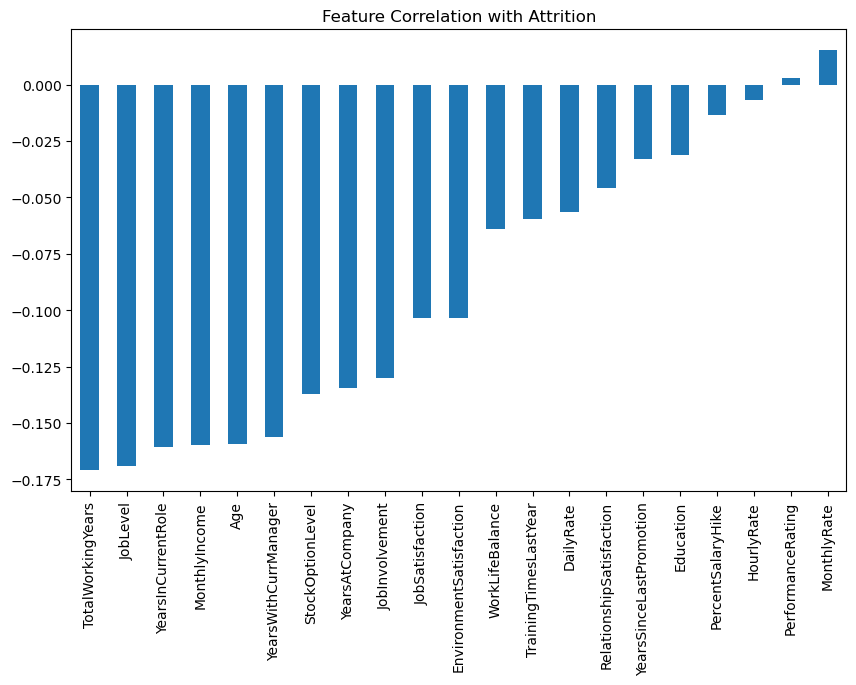

In [89]:
df.corr(numeric_only=True)['Attrition'].sort_values()[:-3].plot(kind='bar', figsize = (10,6))
plt.title('Feature Correlation with Attrition')
None

### From just looking at correlations, we see an unsurprising negative correlation between factors such as Income, years in current role (and therefore years without a promotion), total working years, Work Life Balance and Attrition, among others. More investigation to follow

#### Looking at a few columns that may not add any additional information that could be of use:

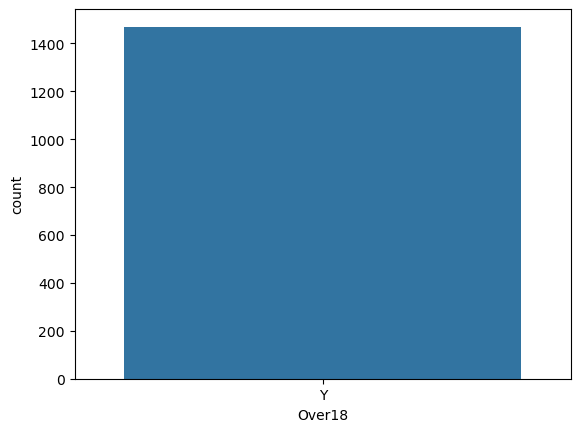

In [5]:
#Over 18 column:
sns.countplot(data = df, x = 'Over18')
None

In [6]:
#Since every employee is over 18 years old, it does not add any information to our model, so we will drop the column:

df = df.drop('Over18', axis=1)

In [14]:
df.StandardHours.unique(), df.StandardHours.value_counts()

(array([80]),
 StandardHours
 80    1470
 Name: count, dtype: int64)

In [7]:
#Every employee has the same number of Standard Hours worked so we will drop this column as well:
df = df.drop('StandardHours', axis=1)

In [16]:
df.EmployeeCount.unique()

array([1])

In [8]:
#Same goes for this column, dropped

df = df.drop('EmployeeCount', axis=1)

In [9]:
#Employee number will also not be needed to train our model and won't aid in our EDA

df = df.drop('EmployeeNumber', axis=1)

In [19]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# EDA:
Note: A google search will indicate that the overall average attrition rate in companies is around 2%, with under 10% being considered healthy. In the case of this dataset, the percentage of employees who left is at 16% so I will position myself as an analyst trying to help the company in reducing their attrition rate, and investigate the factors most affecting attrition / turnover, and making recommendations where I see fit

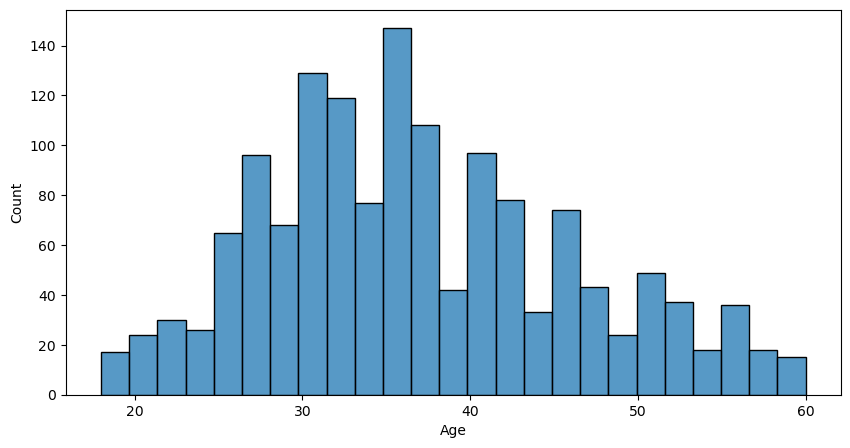

In [87]:
#Looking at distribution of employee ages
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'Age', bins = 25)
None

<Figure size 1200x600 with 0 Axes>

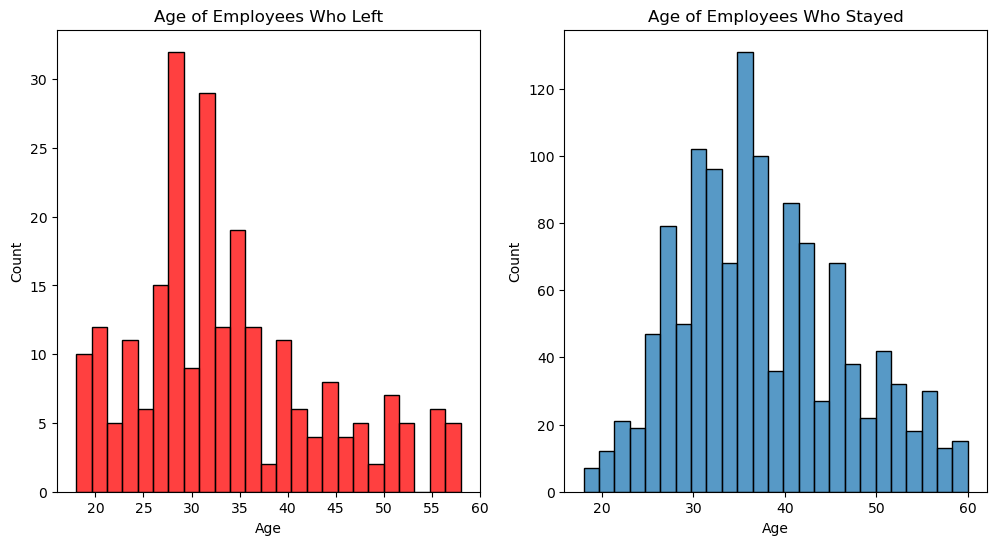

In [78]:
#Looking at age distribution of employees who stayed and left:
plt.figure(figsize=(12,6))
f, axes = plt.subplots(1,2, figsize=(12,6))

sns.histplot(data = df[df['Attrition'] == 1], x = 'Age', ax = axes[0], bins = 25, color = 'red') #Those who left
axes[0].title.set_text('Age of Employees Who Left')

sns.histplot(data = df[df['Attrition'] == 0], x = 'Age', ax = axes[1], bins = 25) #Those who stayed
axes[1].title.set_text('Age of Employees Who Stayed')
None

Though there are many more data points for those who didn't leave, the age of employees who left seems to be skewed more towards lower ages. This doesn't come as a surprise as younger professionals tend to leave their jobs if they find better opportunities. In the case of this company, if they want to decrease employee attrition, more will have to be done to keep younger workers happy. Something to note is that after the age of 55 or so, leaving the company can very likely be due to retirement as changing jobs at that age is very uncommon.


In [20]:
#Getting mean value for each:
print(f"Mean age of employees who left: {round(df[df['Attrition'] == 1]['Age'].mean(), 2)}")
print(f"Mean age of employees who stayed: {round(df[df['Attrition'] == 0]['Age'].mean(), 2)}")



Mean age of employees who left: 33.61
Mean age of employees who stayed: 37.56


In [14]:
#Group by wouldv've been much simpler:
mean_age = df.groupby(by = 'Attrition')['Age'].mean().reset_index()
mean_age['Age'] = round(mean_age['Age'], 2)
mean_age

,Attrition,Age
0,0,37.56
1,1,33.61


<Axes: xlabel='Age', ylabel='MonthlyIncome'>

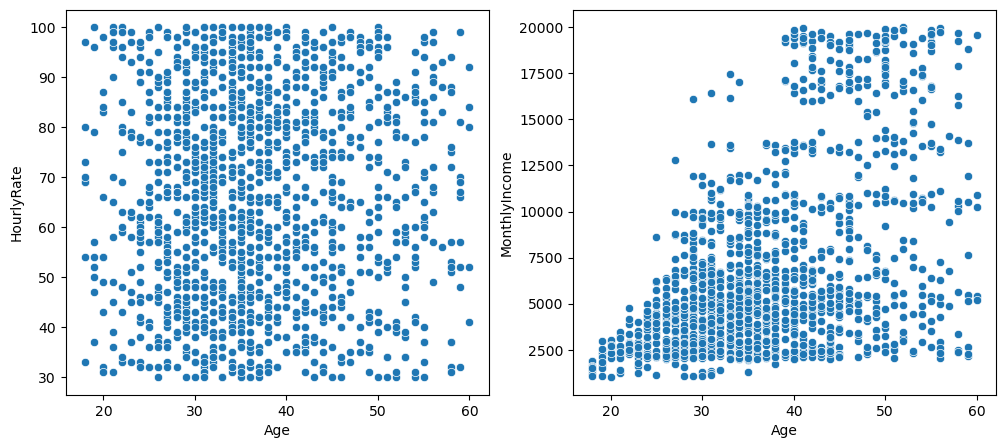

In [43]:

f, axes = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(data = df, x = 'Age', y = 'HourlyRate', ax = axes[0])
sns.scatterplot(data = df, x = 'Age', y = 'MonthlyIncome', ax = axes[1])

No apparent correlation between hourly rate and age, Monthly income seems to increase in general with age, 
however this may only be for certain positions where growth opportunities are more present. I would need more data on each employee's salary progression with time to be able to better judge how employee salaries change with time among employees who stayed and left, and most importantly get additional information among the difference of salary progression between employees who left and stayed

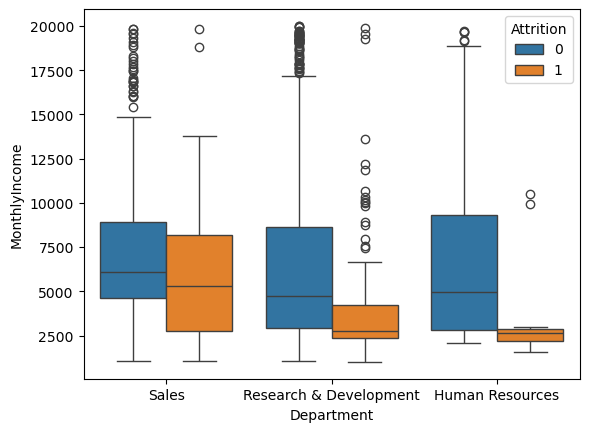

In [85]:
#Looking at monthly salary within each department: 
sns.boxplot(data = df, x = 'Department', y = 'MonthlyIncome', hue = 'Attrition')
None

#### We can clearly see that people who left the company had lower monthly salaries on average compared to others in the same department.

Exploring the HR Department Further:

In [16]:
hr_stayed = df[(df['Attrition'] == 0) & (df['Department'] == 'Human Resources')]
hr_left = df[(df['Attrition'] == 1) & (df['Department'] == 'Human Resources')]

In [17]:
hr_left_avg_years_at_company = hr_left['YearsAtCompany'].mean()
print(f'Average years worked at company among those that left the HR Department: {round(hr_left_avg_years_at_company, 2)}')
hr_stayed_avg_years_at_company = hr_stayed['YearsAtCompany'].mean()
print(f'Average years worked at company among those that did not leave the HR Department: {round(hr_stayed_avg_years_at_company, 2)}')

Average years worked at company among those that left the HR Department: 4.17
Average years worked at company among those that did not leave the HR Department: 7.96


I again would ideally have more time-series data, however this indicates to me that in the first years at the company in HR, salary increase is minimal and only after a certain amount of time (at least 4 years given what we see in the boxplot above), salaries in this department see a big increase. Some employees may find better opportunities in that time span or feel that their work isn't valued enough by the company to stay

In [58]:
#Amount of people that left per department:
print(f"Sales: {len(df[(df['Department'] == 'Sales') & (df['Attrition'] == 1)])}")
print(f"R&D: {len(df[(df['Department'] == 'Research & Development') & (df['Attrition'] == 1)])}")
print(f"HR: {len(df[(df['Department'] == 'Human Resources') & (df['Attrition'] == 1)])}")

#Departure Rates Per Department:
print(f"Sales Attrition Rate: {round(len(df[(df['Department'] == 'Sales') & (df['Attrition'] == 1)]) / len(df[df['Department'] == 'Sales']) * 100, 2)}%")
print(f"R&D Attrition Rate: {round(len(df[(df['Department'] == 'Research & Development') & (df['Attrition'] == 1)]) / len(df[df['Department'] == 'Research & Development']) * 100, 2)}%")
print(f"HR Attrition Rate: {round(len(df[(df['Department'] == 'Human Resources') & (df['Attrition'] == 1)]) / len(df[df['Department'] == 'Human Resources']) * 100, 2)}%")

Sales: 92
R&D: 133
HR: 12
Sales Attrition Rate: 20.63%
R&D Attrition Rate: 13.84%
HR Attrition Rate: 19.05%


In [31]:
#Again, A group by would've been easier:
df[df['Attrition'] == 1].groupby(by = 'Department')['Attrition'].count().sort_values(ascending=False)

Department
Research & Development    133
Sales                      92
Human Resources            12
Name: Attrition, dtype: int64

In [30]:
#Group by for departure rates by department
df.groupby(by = 'Department')['Attrition'].apply(lambda x: round(x.mean() * 100, 2)).sort_values(ascending=False)

Department
Sales                     20.63
Human Resources           19.05
Research & Development    13.84
Name: Attrition, dtype: float64

The above presents new information regarding the boxplot and the severe difference in salary in the HR department compared to others such as R&D and Sales. Having only 12 data points to represent the HR salaries will inevitable skew the average towards in this case, a lower number. Let's look at the R&D department, where the most employees left, and see if we can find anything.

In [35]:
rd_left = df[(df['Attrition'] == 1) & (df['Department'] == 'Research & Development')]
rd_stayed = df[(df['Attrition'] == 0) & (df['Department'] == 'Research & Development')]

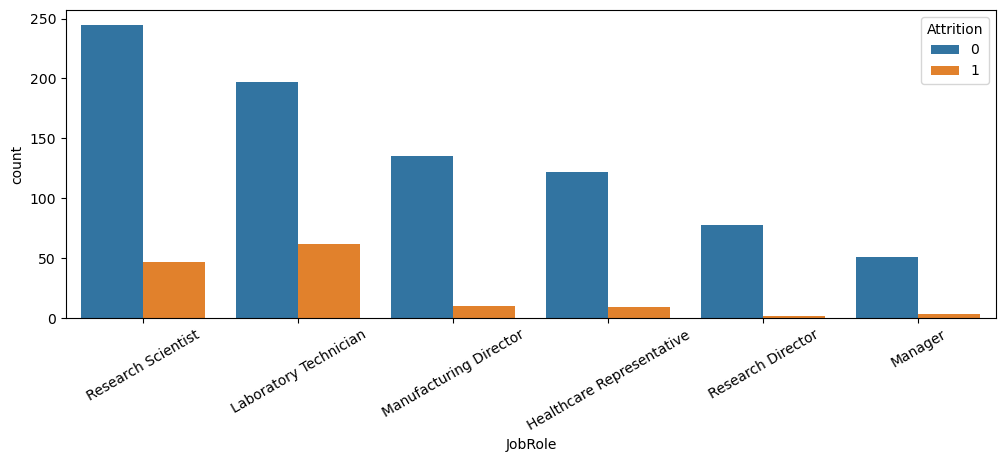

In [127]:
plt.figure(figsize=(12, 4))
sns.countplot(data = df[df['Department'] == 'Research & Development'], x = 'JobRole', hue = 'Attrition')
plt.xticks(rotation = 30)
None

Text(0.5, 1.0, 'Attrition Rate by Job Role within R&D Department')

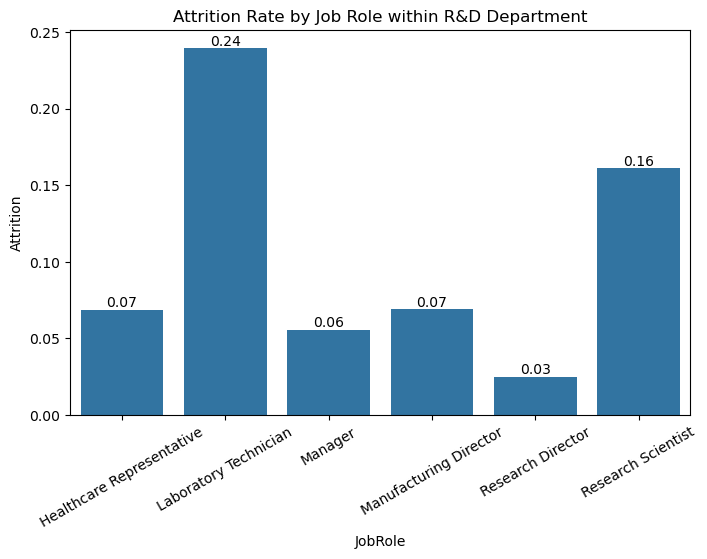

In [14]:
rd_att_rates_df = df[df['Department'] == 'Research & Development'].groupby(by = 'JobRole')['Attrition'].mean().reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(data = rd_att_rates_df, x = 'JobRole', y = 'Attrition')
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),                  # Y-coordinate
        f'{bar.get_height():.2f}',         # Rounded value
        ha='center', va='bottom'          # Alignment
    )
plt.xticks(rotation = 30)
plt.title('Attrition Rate by Job Role within R&D Department')

Lab Technicians are the most vulnerable to attrition given the data, let's compare characteristics between departments to see if we can see why. Note that there can be other factors at play not taken into account by the data such as relationship with manager

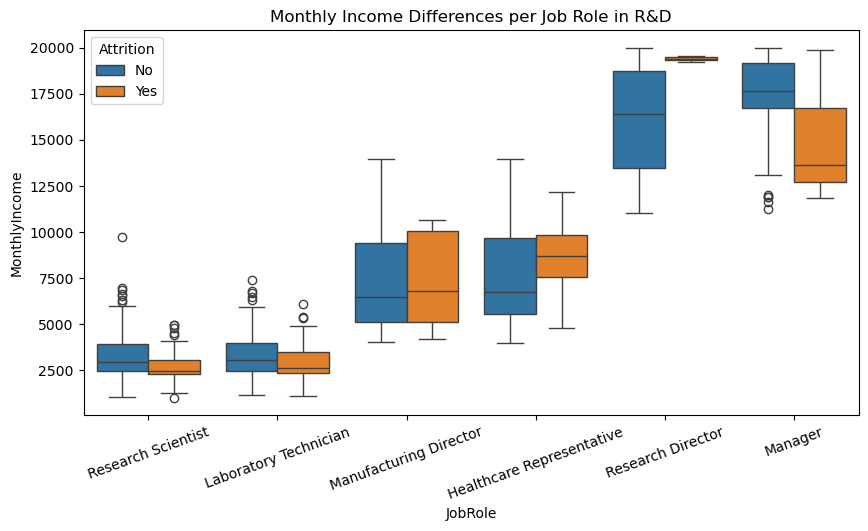

In [7]:
#Income by Department
plt.figure(figsize = (10, 5))
sns.boxplot(data = df[df['Department'] == 'Research & Development'], x = 'JobRole', y = 'MonthlyIncome', hue = 'Attrition')
plt.xticks(rotation = 20)
plt.title('Monthly Income Differences per Job Role in R&D')
None #Prevents text output above plot

In [35]:
df[(df['Department'] == 'Research & Development') & (df['JobRole'] == 'Manager')].groupby(by = 'Attrition')['StockOptionLevel'].mean()

Attrition
0    0.745098
1    0.666667
Name: StockOptionLevel, dtype: float64

Salaries of those who left the R&D department aren't always lower than their counterparts. This is the case however for managers, as they most likely were in search of a higher salary and when expectations weren't met, they looked elsewhere for better opportunities. This likely isn't the sole reason, but definitely a big factor. Given the 4.9% Attrition rate of managers, this amounts to 5 managers that left out of the 54 in the department, reinforcing the idea of salary expectations not being met leading to departure.

The Job Role with the highest Attrition rate, Lab Technicians, had a slightly lower salary than those who stayed. Research would have to be done on industry averages or salaries in similar companies for these positions to see if compensation played a big part in lab tech departures or if there are other factors at play

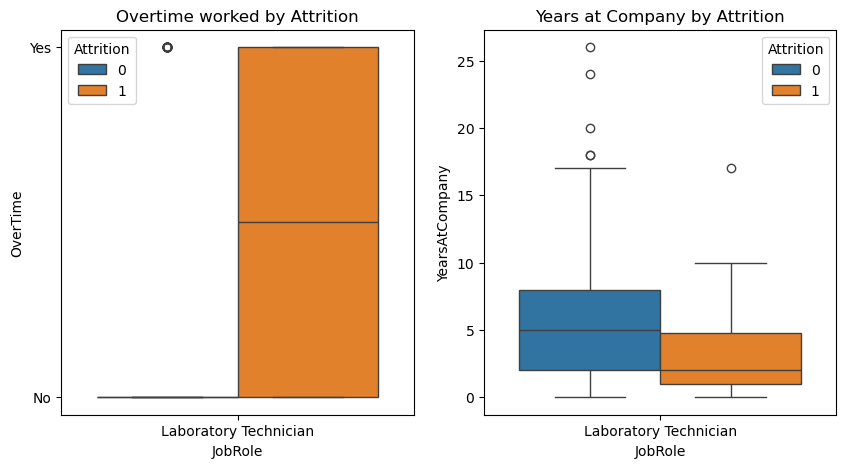

In [119]:
f, axes = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(data = df[(df['Department'] == 'Research & Development') & (df['JobRole'] == 'Laboratory Technician')], x = 'JobRole', y = 'OverTime', hue = 'Attrition', ax = axes[0])
axes[0].title.set_text('Overtime worked by Attrition')

sns.boxplot(data = df[(df['Department'] == 'Research & Development') & (df['JobRole'] == 'Laboratory Technician')], x = 'JobRole', y = 'YearsAtCompany', hue = 'Attrition', ax = axes[1])
axes[1].title.set_text('Years at Company by Attrition')

#f, axes = plt.,subplots()
#sns.boxplot(data = df[(df['Department'] == 'Research & Development') & (df['JobRole'] == 'Laboratory Technician')], x = 'JobRole', y = 'PerformanceRating', hue = 'Attrition')
#plt.xticks(rotation = 20)
#None


In [126]:
lab_techs_left = df[(df['JobRole'] == 'Laboratory Technician') & (df['Attrition'] == 1)]
left_ot = len(lab_techs[lab_techs['OverTime'] == 'Yes'])
stayed_ot = len(lab_techs[lab_techs['OverTime'] == 'No'])

print(f'Percent of Lab Techs that left who worked over time: {round(left_ot / (left_ot + stayed_ot) * 100, 2)}%')

Percent of Lab Techs that left who worked over time: 50.0%


As seen above, half of the lab techs that left the company were working overtime. Given that 0 of the lab techs who stayed worked overtime, this indicates a big factor in their decisions to leave. Changes will have to be made to work-life balance for this position (as well as others) to keep lab techs (especially new ones) happy in their positions. It may be a staple in the company culture that long hours are worked at the beginning, but if it only leads to a high rate of departures than it may have to stop or at lease be attenuated.

Losing employees often and having to recruit new ones can be very costly for the company. Working overtime doesn't tell the full story however, as there are still half of the lab techs who left that didn't work overtime, so there are indeed other factors at play

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<Axes: xlabel='BusinessTravel', ylabel='count'>

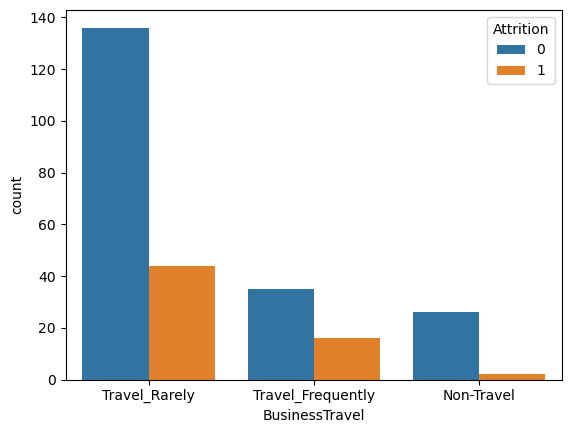

In [38]:
lab_tech_df = df[df['JobRole'] == 'Laboratory Technician']
sns.countplot(data = lab_tech_df, x = 'BusinessTravel', hue = 'Attrition')

In [69]:
#Looking at features' correlation to monthly income
df.corr(numeric_only=True)['MonthlyIncome'].sort_values()

Attrition                  -0.159840
PercentSalaryHike          -0.027269
TrainingTimesLastYear      -0.021736
PerformanceRating          -0.017120
DistanceFromHome           -0.017014
HourlyRate                 -0.015794
JobInvolvement             -0.015271
JobSatisfaction            -0.007157
EnvironmentSatisfaction    -0.006259
StockOptionLevel            0.005408
DailyRate                   0.007707
RelationshipSatisfaction    0.025873
WorkLifeBalance             0.030683
MonthlyRate                 0.034814
Education                   0.094961
NumCompaniesWorked          0.149515
YearsWithCurrManager        0.344079
YearsSinceLastPromotion     0.344978
YearsInCurrentRole          0.363818
Age                         0.497855
YearsAtCompany              0.514285
TotalWorkingYears           0.772893
JobLevel                    0.950300
MonthlyIncome               1.000000
Name: MonthlyIncome, dtype: float64

We see here that Monthly income is highly correlated to factors relating to time such as TotalWorkingYears, YearsAtCompany, Age, and JobLevel which usuallly increases with time. This ties to the fact that the mean age of employees who didn't leave is higher.

<Axes: xlabel='JobRole', ylabel='count'>

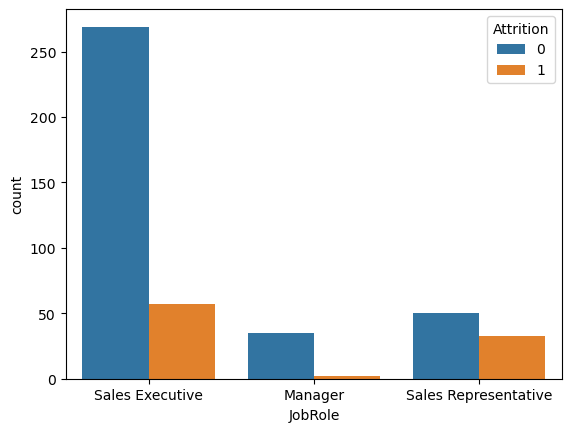

In [60]:
sns.countplot(data = df[(df['Department'] == 'Sales')], x = 'JobRole', hue = 'Attrition')


Out of the sales department, the roles where the highest rate of people left is clearly sales rep. The graph below shows us that sales reps also have the lowest average monthly incomes within the sales department, which helps explain their elevated attrition rate compared to the rest of the sales department

<Axes: xlabel='JobRole', ylabel='MonthlyIncome'>

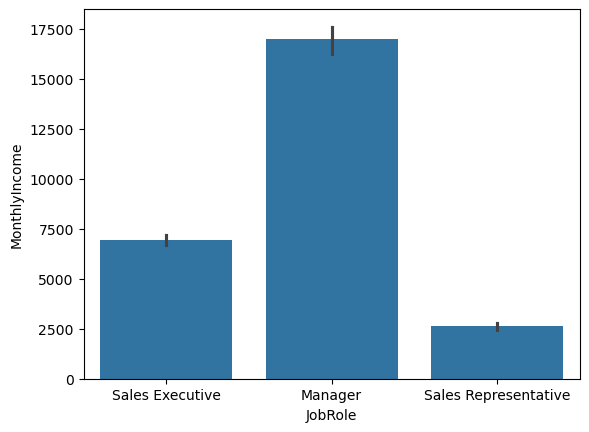

In [83]:
#Mean monthly income among each job role in Sales:
sales_df = df[df['Department'] == 'Sales']
sns.barplot(data = sales_df, x = 'JobRole', y = 'MonthlyIncome', estimator='mean')

<Axes: xlabel='BusinessTravel', ylabel='count'>

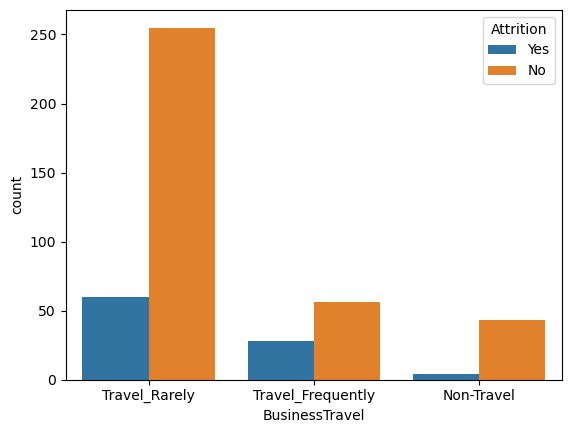

In [11]:
sns.countplot(data = df[df['Department'] == 'Sales'], x = 'BusinessTravel', hue = 'Attrition')

In [16]:
#Getting departure rates:
df[df['Department'] == 'Sales'].groupby(by = 'BusinessTravel')['Attrition'].mean().reset_index()

,BusinessTravel,Attrition
0,Non-Travel,0.085106
1,Travel_Frequently,0.333333
2,Travel_Rarely,0.190476


33% of Sales Reps who left had to travel frequently for work left the company. This indicates a low desire to travel among those in this department and combined with lower salaries, can cause employees to leave. The company would either have to pay employees who have to travel a bit more, or be clearer when recruiting about the travel frequency on the job to decrease turnover rate in this department

<Axes: xlabel='OverTime', ylabel='count'>

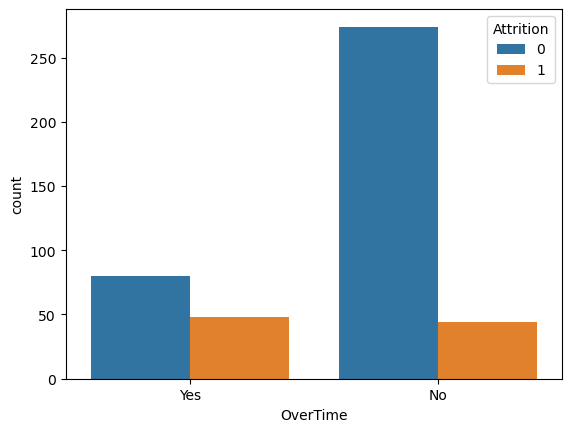

In [20]:
sns.countplot(data = df[df['Department'] == 'Sales'], x = 'OverTime', hue = 'Attrition')

In [21]:
df[df['Department'] == 'Sales'].groupby(by = 'OverTime')['Attrition'].mean().reset_index()

,OverTime,Attrition
0,No,0.138365
1,Yes,0.375000


Again, Working overtime is a big contributing factor to employees leaving within the sales department as it was for lab technicians. Changes would need to be ,ade to improve work-life balance or increase pay for employees to feel that continuing at the company is worth it.

In [87]:
#Taking another look at our columns:
pd.set_option('display.max_columns', 40)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<Axes: xlabel='BusinessTravel', ylabel='count'>

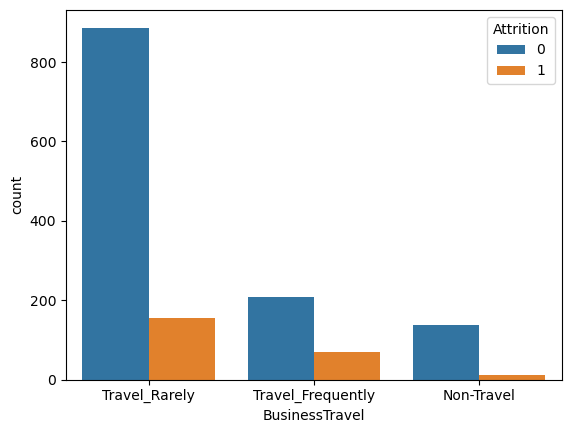

In [17]:
#effect of travel across all departments:
sns.countplot(data = df, x = 'BusinessTravel', hue = 'Attrition')

In [130]:
total_travel_rarely = len((df[df['BusinessTravel'] ==  'Travel_Rarely']))
travel_rarely_and_left = len(df[(df['Attrition'] == 1) & (df['BusinessTravel'] == 'Travel_Rarely')])

print(f'Percent of people who travel rarely for work and left: {round((travel_rarely_and_left / total_travel_rarely) * 100, 2)}%')
print()

total_travel_frequently = len((df[df['BusinessTravel'] ==  'Travel_Frequently']))
travel_frequently_and_left = len(df[(df['Attrition'] == 1) & (df['BusinessTravel'] == 'Travel_Frequently')])
print(f'Percent of people who travel frequently for work and left: {round((travel_frequently_and_left / total_travel_frequently) * 100, 2)}%')
print()

total_no_travel = len((df[df['BusinessTravel'] ==  'Non-Travel']))
no_travel_and_left = len(df[(df['Attrition'] == 1) & (df['BusinessTravel'] == 'Non-Travel')])
print(f'Percent of people who do not travel for work and left: {round((no_travel_and_left / total_no_travel) * 100, 2)}%')
print()

Percent of people who travel rarely for work and left: 14.96%

Percent of people who travel frequently for work and left: 24.91%

Percent of people who do not travel for work and left: 8.0%



In [19]:
#Again, simpler with groupby:
df.groupby(by = 'BusinessTravel')['Attrition'].mean().reset_index()

,BusinessTravel,Attrition
0,Non-Travel,0.080000
1,Travel_Frequently,0.249097
2,Travel_Rarely,0.149569


This tells us that the more frequently people travel for work, the more likely they are to leave across all departments and not just the sales departments

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

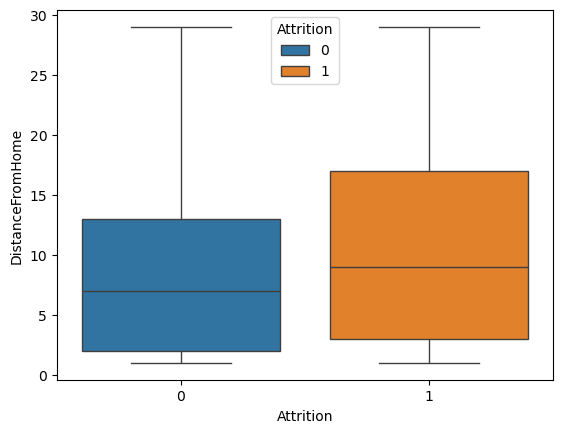

In [46]:
sns.boxplot(data = df, x = 'Attrition', y = 'DistanceFromHome', hue = 'Attrition')

People who left lived further from work on average (this was rather expected but is also usually known by the employee upon starting the job)

<Axes: xlabel='Education', ylabel='MonthlyRate'>

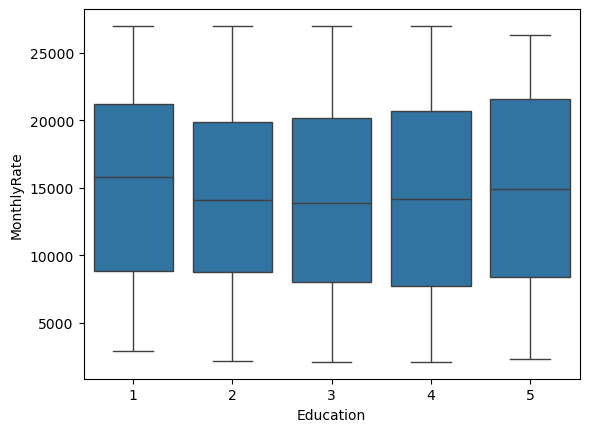

In [10]:
sns.boxplot(data = df, x = 'Education', y = 'MonthlyRate')

Education doesn't have a big impact on employee salary

<Axes: xlabel='MaritalStatus', ylabel='count'>

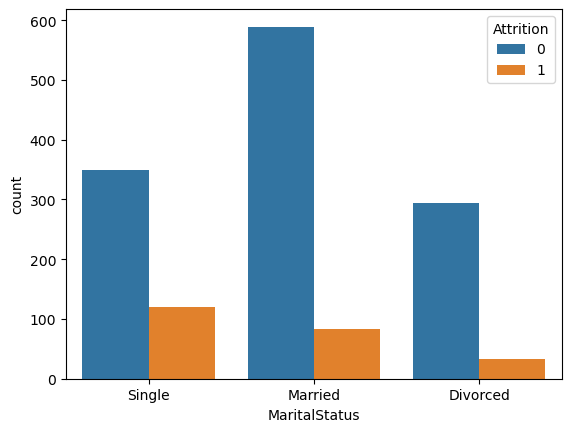

In [53]:
sns.countplot(data = df, x = 'MaritalStatus', hue = 'Attrition')

Attrition rate highest for single people (precise rates calculated below) which makes sense, as once people start a family (or get married) they are less likely to quit due to financial obligations, or they're just living a more stable lifestyle. Single people are also younger in general than those who are married which ties back to the mean age of employees who left being lower than those who stayed

In [22]:
#Rates by Marital Status:
df.groupby(by = 'MaritalStatus')['Attrition'].mean().reset_index()

,MaritalStatus,Attrition
0,Divorced,0.100917
1,Married,0.124814
2,Single,0.255319


In [56]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<Axes: xlabel='Gender', ylabel='count'>

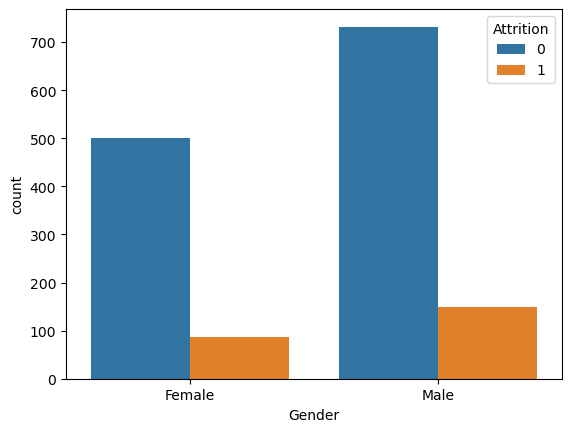

In [91]:
sns.countplot(data = df, x = 'Gender', hue = 'Attrition')

No apparent effect of gender on attrition

<Axes: xlabel='YearsAtCompany', ylabel='count'>

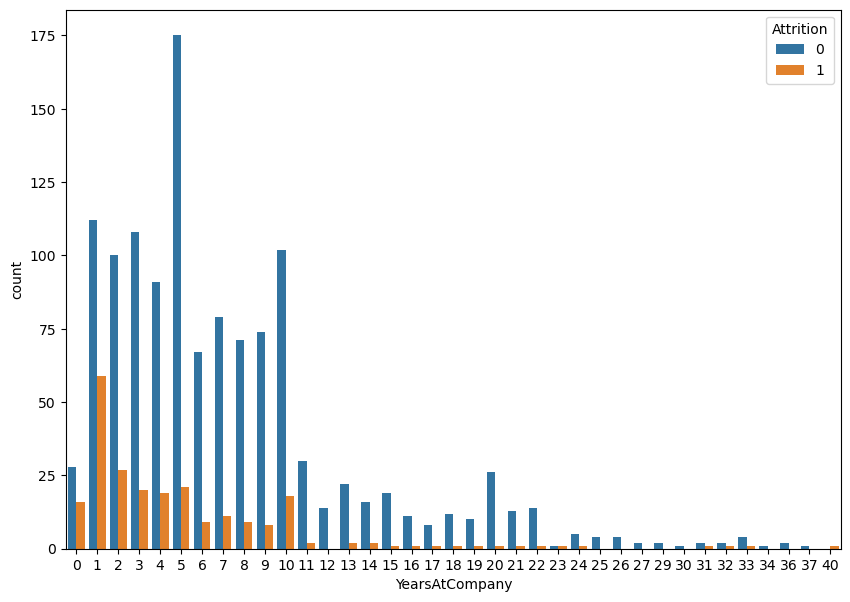

In [98]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'YearsAtCompany', hue = 'Attrition')

Normal for higher attrition rates to correspond to lower number of years spent at the company. Attritions after a certain amount of time at the company (20+ years) may be due to retirement 

In [79]:
tenure_att_df = df.groupby(by = 'YearsAtCompany')['Attrition'].mean().reset_index()
tenure_att_df['Attrition'] = tenure_att_df['Attrition'].apply(lambda x: round(x * 100, 2))
tenure_att_df = tenure_att_df.rename({'Attrition' : 'Attrition Rate'}, axis = 1)
tenure_att_df

,YearsAtCompany,Attrition Rate
0,0,36.36
1,1,34.50
2,2,21.26
3,3,15.62
4,4,17.27
5,5,10.71
6,6,11.84
7,7,12.22
8,8,11.25
9,9,9.76


<Axes: xlabel='YearsAtCompany', ylabel='Attrition Rate'>

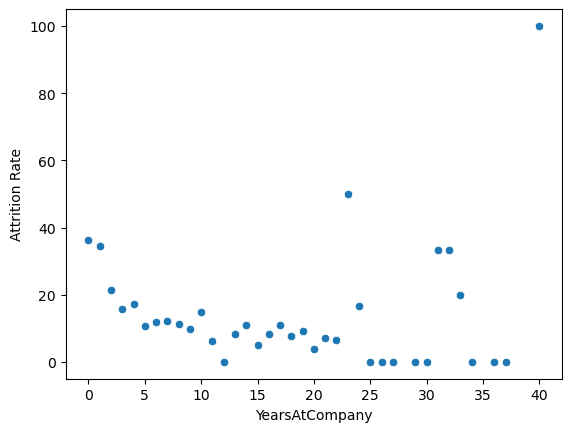

In [80]:
sns.scatterplot(data = tenure_att_df, x = 'YearsAtCompany', y = 'Attrition Rate')

Here we see a fall in attrition rate after 2 years at the company, a spike at around 23 years at the company where the rate rises to 50%, as well as elevated rates after 31-33 years at the company. There is a general downward trend in Attrition rates the longer employees stay at the company, so the key is to keep employees engaged and happy in the first few years 

In [86]:
df[df['YearsAtCompany'] == 23].groupby('JobRole')['Attrition'].sum().reset_index()

,JobRole,Attrition
0,Healthcare Representative,0
1,Sales Executive,1


In [91]:
df[(df['YearsAtCompany'] == 23) & df['Attrition'] == 1]['YearsSinceLastPromotion']

1223    14
Name: YearsSinceLastPromotion, dtype: int64

Though the attrition Rate at 23 years worke at the company is 50%, it's just one employee who left out of the two who have been there for that long, the one who left being a Sales Exec. This employee hadn't gotten a promotion in 14 years, indicating no career progression which is often a big motivator for employees to leave

In [82]:
df[(df['YearsAtCompany'] >= 31) & (df['YearsAtCompany'] <= 33)].groupby('JobRole')['Attrition'].sum()

JobRole
Healthcare Representative    0
Manager                      1
Manufacturing Director       1
Research Director            1
Name: Attrition, dtype: int64

For the spike at 31-33 years at the company, a few placed employees are leaving (Directors and Managers mostly). 

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

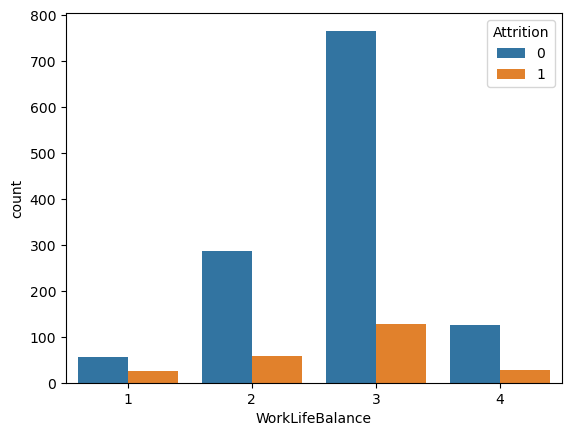

In [69]:
sns.countplot(data = df, x = 'WorkLifeBalance', hue = 'Attrition')

Attrition rate clearly highest for those with minimal work-life balance

<Axes: xlabel='StockOptionLevel', ylabel='count'>

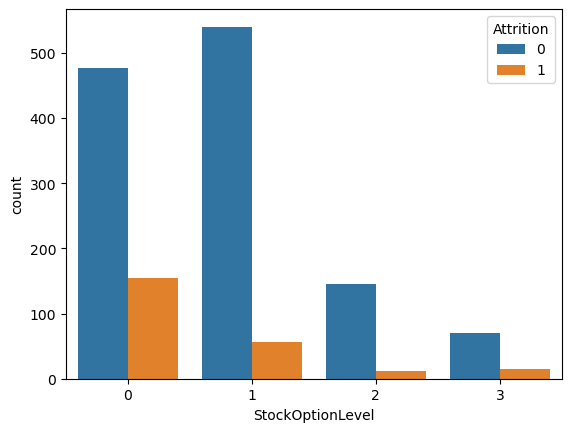

In [76]:
sns.countplot(data = df, x = 'StockOptionLevel', hue = 'Attrition')

Attrition rates lower in those that have a higher stock option level, which is normal as employees with more options will at least need to wait until they vest. Something the company should consider doing is giving new employees stock options in the company from the start to keep them motivated and tie their work more to the company's success.

In [30]:
df.groupby(by = 'StockOptionLevel')['Attrition'].mean().reset_index()

,StockOptionLevel,Attrition
0,0,0.244057
1,1,0.093960
2,2,0.075949
3,3,0.176471


The increase in Attrition rate once the option level gets to 3 is likely due to them being exercised and employees leaving with the money. Maybe options that take longer to vest would be a way to keep employees for longer and as stated, tied to the company's success.

C:\Users\jules\AppData\Local\Temp\ipykernel_1552\4245074510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = att_rate_num_comp, x = 'NumCompaniesWorked', y = 'Attrition', palette = 'plasma')


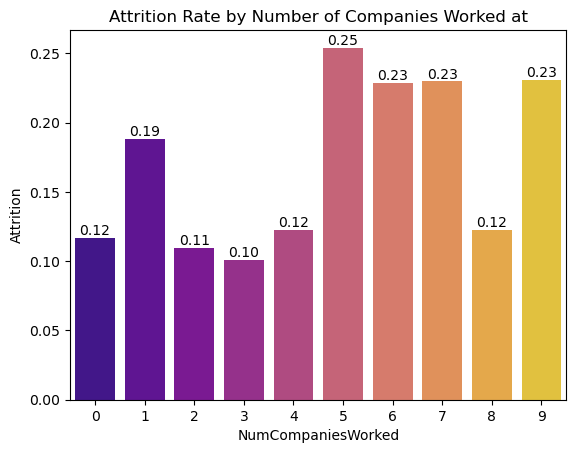

In [93]:
att_rate_num_comp = df.groupby(by = 'NumCompaniesWorked')['Attrition'].mean().reset_index()
ax = sns.barplot(data = att_rate_num_comp, x = 'NumCompaniesWorked', y = 'Attrition', palette = 'plasma')
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),                  # Y-coordinate
        f'{bar.get_height():.2f}',         # Rounded value
        ha='center', va='bottom'          # Alignment
    )
plt.title('Attrition Rate by Number of Companies Worked at')
None

Attrition rates on average are higher after about 5 different companies worked at. When recruiting new employees, this company should avoid hiring those who have worked at multiple (5+) companies before them to prevent attrition from the start, or at least make sure there is good reasoning to explain the frequent job changes.

<Axes: xlabel='Age', ylabel='NumCompaniesWorked'>

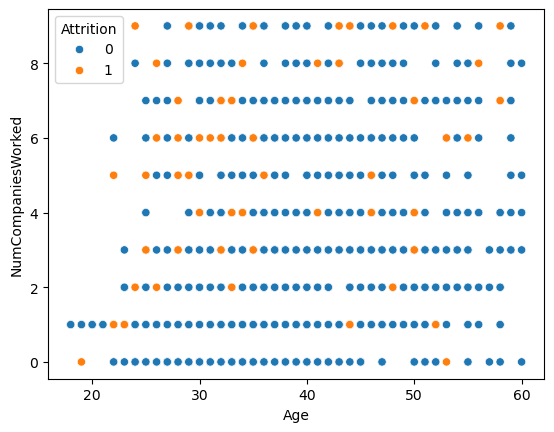

In [34]:
sns.scatterplot(x='Age', y='NumCompaniesWorked', data=df, alpha=1, hue = 'Attrition')

We see very clearly here that the 1st quadrant (ie where people are younger and have worked for multiple companies), there is significantly more attrition than any other combination of age and companies worked at.

In [39]:
df[(df['Age'] < 40) & (df['NumCompaniesWorked'] >= 4)]['Attrition'].mean()

np.float64(0.24553571428571427)

<Axes: xlabel='DistanceFromHome', ylabel='count'>

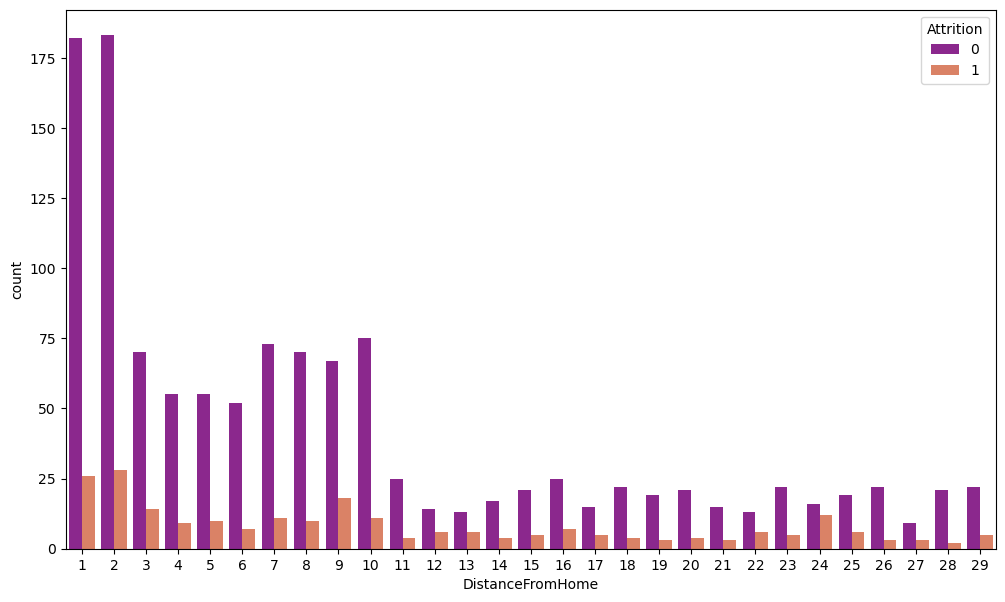

In [130]:
plt.figure(figsize=(12,7))
sns.countplot(data = df, x = 'DistanceFromHome', hue = 'Attrition', palette = 'plasma')

C:\Users\jules\AppData\Local\Temp\ipykernel_21020\905375231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = dist_from_home_attn, x = 'DistanceFromHome', y = 'Attrition', palette = 'plasma')


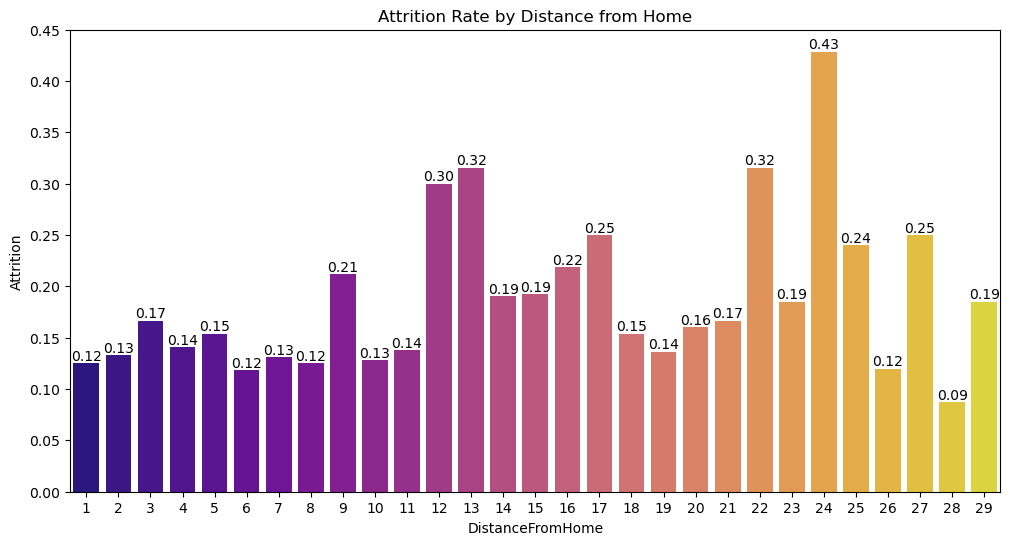

In [142]:
#Attrition rate by distance from home unit:
dist_from_home_attn = df.groupby(by='DistanceFromHome')['Attrition'].mean().reset_index()
plt.figure(figsize=(12,6))
ax = sns.barplot(data = dist_from_home_attn, x = 'DistanceFromHome', y = 'Attrition', palette = 'plasma')
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),                  # Y-coordinate
        f'{bar.get_height():.2f}',         # Rounded value
        ha='center', va='bottom'          # Alignment
    )
plt.title('Attrition Rate by Distance from Home')
None

As we can see, Attrition Rates can get very high the further away employees live. Some ways for the company to avoid this would be by either requiring that candidates live closer to company offices or implementing a hybrid model where employees may also work remotely, which may be difficult in the case of a company that has an R&D department with lab technicians which likely requires on-site work

# Preprocessing:

In [257]:
df.select_dtypes(include = ['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [258]:
categorical_features_to_convert = df[df.select_dtypes(include = ['object']).columns]

In [259]:
from sklearn.preprocessing import OneHotEncoder

In [260]:
encoder = OneHotEncoder()
categorical_features_to_convert = encoder.fit_transform(X = categorical_features_to_convert).toarray()

In [261]:
converted_features = pd.DataFrame(categorical_features_to_convert)

In [262]:
converted_features.columns = encoder.get_feature_names_out()

In [263]:
converted_features

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [264]:
df = pd.concat([df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'], axis=1), converted_features], axis=1)

In [265]:
df.shape

(1470, 52)

In [15]:
pd.set_option('display.max_columns', 60)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [266]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [155]:
import imblearn
print(imblearn.__version__)

0.12.4


## Splitting and Scaling Data:

SMOTE did not end up being used as it led to worse results than without. The cause was reducing the separability between classes which led to extremely inaccurate predictions of the majority class (employees who stayed)

In [278]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [225]:
from imblearn.over_sampling import SMOTE

In [227]:
#Balancing Target Variable:
#from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print()
print(y_train_smote.value_counts())


Attrition
0    910
1    192
Name: count, dtype: int64

Attrition
1    910
0    910
Name: count, dtype: int64


C:\Users\jules\anaconda3\envs\PythonDataStuff\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [280]:
scaler = MinMaxScaler()

In [281]:
X_train = scaler.fit_transform(X_train)

In [282]:
X_test = scaler.transform(X_test)

In [283]:
X_test.shape

(368, 51)

### We will now try a few different models (Logistic Regression, SKL Random Forest,  Artificial Neural Network) to make predictions and see which ones perform best:

## Important note:
This dataset only consists of 1000 rows, making it very difficult to get good performance out of the models, especially one like an Artificial Neural Ntwork that thrives off large amounts of data

### Logistic Regression:

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [289]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [290]:
log_reg_predictions = log_reg_model.predict(X_test)

In [291]:
print(confusion_matrix(y_test, log_reg_predictions))

[[302   7]
 [ 34  25]]


<Axes: >

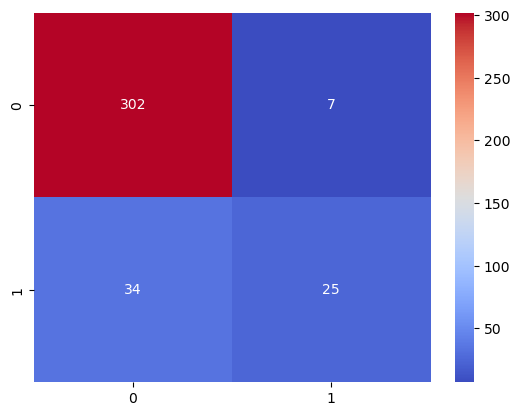

In [292]:
sns.heatmap(confusion_matrix(y_test, log_reg_predictions), cmap='coolwarm', annot=True, fmt='g')

In [237]:
print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       323
           1       1.00      0.04      0.09        45

    accuracy                           0.88       368
   macro avg       0.94      0.52      0.51       368
weighted avg       0.90      0.88      0.83       368



### SKL Random Forest:

In [293]:
from sklearn.ensemble import RandomForestClassifier

In [297]:
sk_rand_forest = RandomForestClassifier()
sk_rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [298]:
sk_rand_forest_preds = sk_rand_forest.predict(X_test)

<Axes: >

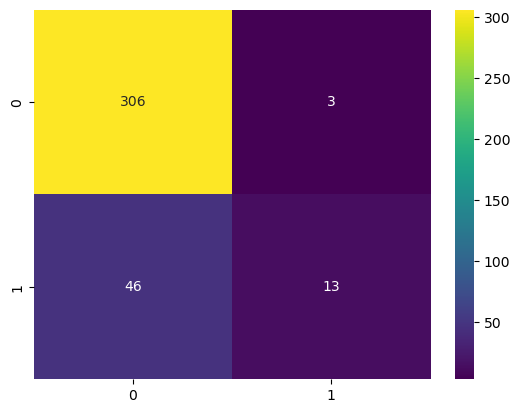

In [299]:
sns.heatmap(confusion_matrix(y_test, sk_rand_forest_preds), cmap = 'viridis', annot = True, fmt='g')

In [300]:
print(classification_report(y_test, sk_rand_forest_preds))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.81      0.22      0.35        59

    accuracy                           0.87       368
   macro avg       0.84      0.61      0.64       368
weighted avg       0.86      0.87      0.83       368



Performance is still poor in accurately predicting attrition. The best way to improve performance would be to have lots more data which isn't possible here. Also, simple oversampling the minority class could help but would lead to biased results on the training data that wouldn't necessarily translate well to the test data

In [36]:
#Doing a Grid Search to see if we can improve performance:

In [175]:
param_grid = {'n_estimators': [10,15,25,50,100,150,200,250,300,350],
             'max_depth': [None, 3,5,7,9,11,13],
             'min_samples_split': [2, 5, 10],
             'bootstrap': [True, False]}

In [176]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [177]:
random_search_sk_forest = RandomizedSearchCV(estimator=sk_rand_forest, param_distributions=param_grid, cv = 5,
                                            n_iter=100, verbose=1)


In [301]:
random_search_sk_forest.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 5, 7, 9, 11, 13],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 15, 25, 50, 100,
                                                         150, 200, 250, 300,
                                                         350]},
                   verbose=1)

C:\Users\jules\anaconda3\envs\PythonDataStuff\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: >

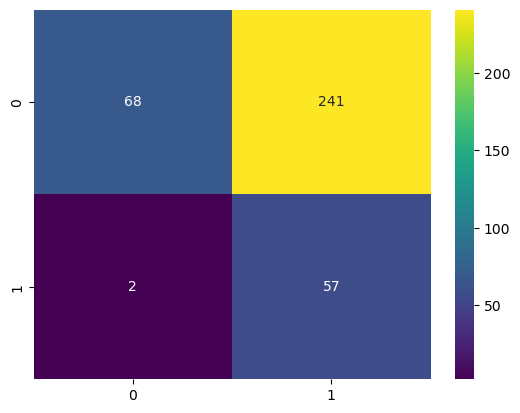

In [302]:
rand_search_forest_preds = random_search_sk_forest.predict(X_test)
sns.heatmap(confusion_matrix(y_test, rand_search_forest_preds), cmap = 'viridis', annot = True, fmt='g')

In [303]:
print(classification_report(y_test, rand_search_forest_preds))

              precision    recall  f1-score   support

           0       0.97      0.22      0.36       309
           1       0.19      0.97      0.32        59

    accuracy                           0.34       368
   macro avg       0.58      0.59      0.34       368
weighted avg       0.85      0.34      0.35       368



Random search to optimize model parameters ultimately led to a lesser-performing model especially where recall is concerned, which is one of the most important metrics in the case of a classification problem with an unbalanced target variable

### Artificial Neural Network:

In [182]:
X_train.shape

(1848, 51)

In [184]:
pip install tensorflow

   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
    --------------------------------------- 7.9/375.7 MB 44.2 MB/s eta 0:00:09
   -- ------------------------------------- 19.4/375.7 MB 48.9 MB/s eta 0:00:08
   -- ------------------------------------- 27.8/375.7 MB 46.3 MB/s eta 0:00:08
   ---- ----------------------------------- 38.3/375.7 MB 46.8 MB/s eta 0:00:08
   ----- ---------------------------------- 50.6/375.7 MB 48.8 MB/s eta 0:00:07
   ------ --------------------------------- 62.4/375.7 MB 50.3 MB/s eta 0:00:07
   ------- -------------------------------- 74.2/375.7 MB 51.4 MB/s eta 0:00:06
   --------- ------------------------------ 86.0/375.7 MB 52.2 MB/s eta 0:00:06
   ---------- ----------------------------- 97.8/375.7 MB 52.4 MB/s eta 0:00:06
   ----------- --------------------------- 109.3/375.7 MB 52.9 MB/s eta 0:00:06
   ------------ -------------------------- 121.9/375.7 MB 53.3 MB/s eta 0:00:05
   ------------- ------------------------- 134.2/3

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [186]:
ann_model = Sequential()

ann_model.add(Dense(units = 51, activation='relu')) #Units of 51 to match number of features in X_train

ann_model.add(Dense(units = 25, activation='relu'))

ann_model.add(Dense(units = 1, activation='sigmoid'))

ann_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [187]:
ann_model.fit(X_train_smote, y_train_smote, epochs = 150, validation_data=(X_test, y_test), batch_size = 32)

Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5038 - loss: 158.7047 - val_accuracy: 0.6739 - val_loss: 0.6515
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5609 - loss: 11.1525 - val_accuracy: 0.7310 - val_loss: 0.6409
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5329 - loss: 7.8075 - val_accuracy: 0.7255 - val_loss: 0.6398
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5515 - loss: 8.8103 - val_accuracy: 0.6821 - val_loss: 0.6565
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6024 - loss: 3.8000 - val_accuracy: 0.6413 - val_loss: 0.6702
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5825 - loss: 5.2581 - val_accuracy: 0.6033 - val_loss: 0.6809
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5765 - loss: 5.3353 - val_accuracy: 0.6168 - val_loss: 0.6745
Epoch 8/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 7.8105 - val_accuracy: 0.5842

In [188]:
metrics = pd.DataFrame(ann_model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.540043,75.220383,0.673913,0.651518
1,0.556818,11.295815,0.730978,0.640850
2,0.556277,6.976237,0.725543,0.639774
3,0.566017,7.421590,0.682065,0.656474
4,0.579004,4.689263,0.641304,0.670243


<Axes: >

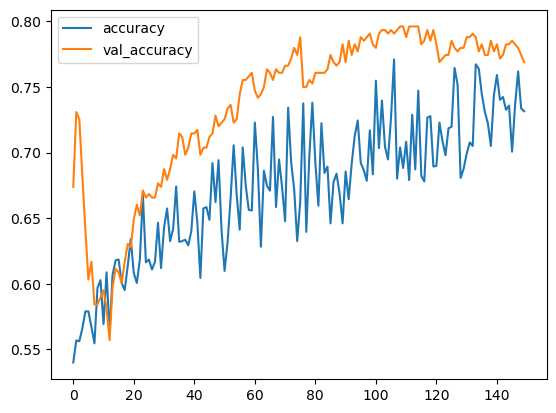

In [189]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

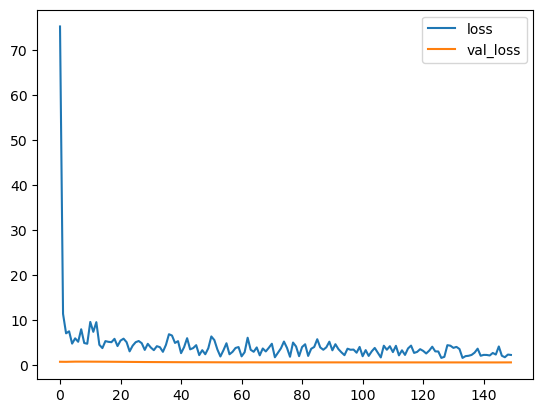

In [191]:
metrics[['loss', 'val_loss']].plot()

Validation loss starts increasing pretty quickly so we have definitely overfitted our model, not as many epochs are needed. Adding dropout layers as well as early stopping will also help prevent overfitting

In [192]:
ann_model = Sequential()

ann_model.add(Dense(units = 51, activation='relu')) #Units 51 to match number of features in X_train
ann_model.add(Dropout(0.3))
ann_model.add(Dense(units = 25, activation='relu'))
ann_model.add(Dropout(0.25))
ann_model.add(Dense(units = 1, activation='sigmoid'))

ann_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [193]:
from tensorflow.keras.callbacks import EarlyStopping

In [194]:
early_stop = EarlyStopping(patience=4, monitor = 'val_accuracy')

In [196]:
ann_model.fit(X_train_smote, y_train_smote, epochs = 80, validation_data=(X_test, y_test), batch_size = 32, callbacks=[early_stop])

Epoch 1/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5168 - loss: 641.2355 - val_accuracy: 0.6630 - val_loss: 0.6659
Epoch 2/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5284 - loss: 246.0585 - val_accuracy: 0.4810 - val_loss: 0.6982
Epoch 3/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5451 - loss: 135.0215 - val_accuracy: 0.4239 - val_loss: 0.7030
Epoch 4/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5280 - loss: 73.5215 - val_accuracy: 0.3234 - val_loss: 0.7085
Epoch 5/80
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 47.4955 - val_accuracy: 0.2038 - val_loss: 0.7125


In [197]:
metrics = pd.DataFrame(ann_model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.533550,485.192200,0.663043,0.665937
1,0.530303,222.977295,0.480978,0.698154
2,0.533550,116.019203,0.423913,0.703007
3,0.521645,67.670578,0.323370,0.708519
4,0.508117,42.529930,0.203804,0.712515


<Axes: >

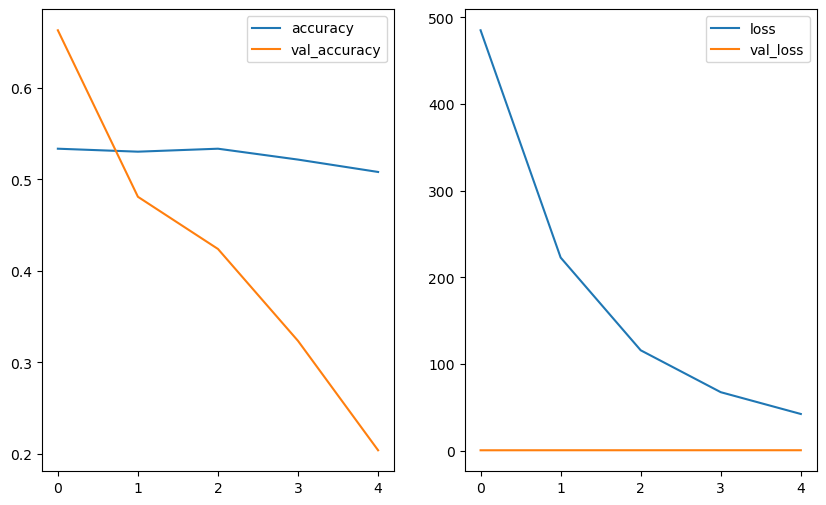

In [198]:
f, axes = plt.subplots(1,2, figsize = (10,6))
metrics[['accuracy', 'val_accuracy']].plot(ax = axes[0])
metrics[['loss', 'val_loss']].plot(ax = axes[1])

In [199]:
predictions_ann = ann_model.predict(x = X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [202]:
bin_pred_ann = (predictions_ann >= 0.75).astype(int)

In [61]:
bin_pred_ann

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [203]:
print(classification_report(y_test, bin_pred_ann))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       309
           1       0.00      0.00      0.00        59

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



C:\Users\jules\anaconda3\envs\PythonDataStuff\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jules\anaconda3\envs\PythonDataStuff\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jules\anaconda3\envs\PythonDataStuff\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

Again, class imbalance and inability to use smote amongst other tools to balance leads to a poor recall and precision

## Optimizing Network Structure using Keras Tuner: The following is the code for it but the model will not be tuned due to long run times

In [44]:
from kerastuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [51]:
def build_model(hp): #put hp argument later:
    ann_model = Sequential()

    ann_model.add(Dense(units = hp.Int('input_units', min_value = 50, max_value = 250, step = 50), activation='relu')) #Units 51 to match number of features in X_train
    ann_model.add(Dropout(hp.Float('input_layer_dropout_rate', min_value = 0.1, max_value = 0.7, step = 0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        ann_model.add(Dense(units = hp.Int(f'layer_{i}_units', min_value = 50, max_value = 250, step = 50), activation='relu'))
        ann_model.add(Dropout(0.25))

    
    ann_model.add(Dense(units = 1, activation='sigmoid'))

    
    ann_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [48]:
tuner = RandomSearch(hypermodel= build_model, objective='val_accuracy', max_trials=25)

# Run this to do search 


In [52]:
#tuner.search(x = X_train, y = y_train, epochs = 40, validation_data = (X_test, y_train))

## Overall, logistic regression seemed to perform best, especially when considering efficiency of the model